In [181]:
import string
from string import punctuation
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import pandas as pd
from collections import defaultdict

import matplotlib.pyplot as plt
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re


allPresidentSpeech = inaugural.fileids()

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\vijle\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vijle\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [182]:
Republican = {"Republican":["Lincoln", "Grant", "Hayes", "Garfield", "Arthur", "Harrison", "McKinley", "Roosevelt-Theodore" , "Taft" , "Harding", "Coolidge", "Hoover", "Eisenhower", "Nixon", "Ford", "Reagan", "Bush-H.W.", "Bush","Trump"]}
Democrats = {"Democrats" : ["Jackson", "Buren", "Polk", "Pierce", "Buchanan", "Cleveland", "Wilson", "Roosevelt", "Truman", "Kennedy", "Johnson", "Carter", "Clinton", "Obama"]}
Federalist = {"Federalist": ["Washington", "Adams-John"]}
DemocraticRepublican = {"DemocraticRepublican" : ["Jefferson", "Madison", "Monroe", "Adams"]}
Whig = {"Whig" :["Harrison-William", "Tyler", "Taylor", "Fillmore"]}
Union = {"Union" : ["Andrew Johnson"]}

In [184]:
punctuation = punctuation + '--'
wordnet = nltk.stem.WordNetLemmatizer()
SetofWordsRD = defaultdict(list)
presidentSpeech = defaultdict(list)
presidentWordsFreq = {}
presidentWordCorpus = defaultdict(list)


for index, speech in enumerate(allPresidentSpeech):
    keyName = speech.split('.')[0]
    name = keyName.split('-')[1]
    if (keyName=='1905-Roosevelt'):
        keyName = keyName+'-Theodore'
        name = "Roosevelt-Theodore"
    if (keyName=='1989-Bush'):
        keyName = keyName+'-H.W.'
        name = "Bush-H.W."
    if (keyName=='1797-Adams'):
        keyName = keyName+'-John'
        name = "Adams-John"
    if (keyName=='1841-Harrison'):
        keyName = keyName+'-William'
        name = "Harrison-William"
    for x in (Republican,Democrats,Federalist,DemocraticRepublican,Whig,Union):
        for value in list(x.values())[0]:
            if name==value:
                party = list(x.keys())[0]
                break
    rawSpeech = inaugural.raw(fileids=speech)
    speechfile = inaugural.open(speech)
    ListofSpeeches = speechfile.readlines()
    words = inaugural.words(fileids=speech)
    sentence = inaugural.sents(fileids=speech)
    vocabularylower = set([w.lower() for w in words])
    vocabWithoutpunct = [w for w in vocabularylower if not w in punctuation]
    vocabWithoutStopWords = [w for w in vocabWithoutpunct if not w in stop_words]
    finalWordsGroup = [w for w in vocabWithoutStopWords if len(w) >1]
    finalWordsGroupLemmatized = [wordnet.lemmatize(w) for w in finalWordsGroup]
    #question 3 part 1
    wordsWithoutStopRD =[]
    wordsWithoutStopRDpunct =[]
    lemmatized = []
    wordslower = []
    wordslower = [w.lower() for w in words]
    wordsWithoutStopRD = [w for w in wordslower if not w in stop_words]
    wordsWithoutStopRDpunct = [w for w in wordsWithoutStopRD if not w in punctuation]
    lemmatized = [wordnet.lemmatize(w) for w in wordsWithoutStopRDpunct]
    finalWordsGroupRD = [w for w in lemmatized if len(w) >1]
    presidentWordCorpus[name].append(finalWordsGroupRD)
    presidentSpeech[name].append(ListofSpeeches)
    #question 3 part 2
    if party=="Republican":
        SetofWordsRD['Republican'].append(finalWordsGroupRD)
    if party=="Democrats":
        SetofWordsRD['Democrats'].append(finalWordsGroupRD)
    if (party=="DemocraticRepublican" or party=="Federalist" or party=="Whig" or party=="Union"):
        SetofWordsRD['others'].append(finalWordsGroupRD)
    avg_words_per_sentence = len(words)/len(sentence)
    presidentSpeech[keyName] = [len(rawSpeech),len(words),len(sentence),avg_words_per_sentence,len(finalWordsGroup),len(finalWordsGroupLemmatized),party]

In [185]:
presidentWordsTop5Freq = {}
presidentWordCorpus_dict = {}
for key in presidentWordCorpus:
    name = key
    presidentWords = {}
    words_freq =[]
    presidentWordCorpus_List = []
    for i in range(len(presidentWordCorpus[key])):
        for word in presidentWordCorpus[key][i]:
            presidentWordCorpus_List.append(word)
    presidentWordCorpus_dict[name] = presidentWordCorpus_List
    for w in presidentWordCorpus_List:
        if w in presidentWords:  
            presidentWords[w] += 1  
        else:  
            presidentWords[w] = 1 
    for key, value in presidentWords.items():
        words_freq.append((value, key))
        words_freq.sort(reverse=True)
        top5 = words_freq[0:5]
        presidentWordsTop5Freq[name] = top5

allpartyList = {}
RepublicanWordsList = []
DemocraticWordsList = []
OthersWordsList = []
for i in range(len(SetofWordsRD["Republican"])):
    for word in SetofWordsRD["Republican"][i]:
        RepublicanWordsList.append(word)
allpartyList["Republican"] = RepublicanWordsList
for i in range(len(SetofWordsRD["Democrats"])):
    for word in SetofWordsRD["Democrats"][i]:
        DemocraticWordsList.append(word)
allpartyList["Democrats"] = DemocraticWordsList
for i in range(len(SetofWordsRD["others"])):
    for word in SetofWordsRD["others"][i]:
        OthersWordsList.append(word)
allpartyList["others"] = OthersWordsList

In [186]:
def intersection(Republic, Demo): 
    lst3 = [value for value in Republic if value in Demo] 
    return lst3 
def Diff(Republic, Demo): 
    return (list(set(Republic) - set(Demo))) 

R_ND = Diff(RepublicanWordsList,DemocraticWordsList)
D_NR = Diff(DemocraticWordsList,RepublicanWordsList)
common = intersection(RepublicanWordsList,DemocraticWordsList)

In [187]:
presidentDF = pd.DataFrame([[k, *v] for k, v in presidentSpeech.items()], columns=['president_name', 'charachters', 'words', 'sentences','words_per_sentences','vocab_with_stop_words','vocab_without_stop_words','party_name'],)

In [188]:
df = presidentDF[["president_name","vocab_without_stop_words","party_name"]]
final_df = df.sort_values(by=['vocab_without_stop_words'], ascending=False)
df['colors'] = 'r'
df.loc[df.party_name=='Democrats','colors'] = 'b'
df.loc[(df['party_name'] != 'Democrats') & (df['party_name'] != 'Republican'),'colors'] = 'grey'

C:\Users\vijle\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [247]:
#Sentiment Analysis
finalDictofSpeeches = {}

for key in presidentSpeech:
    finalspeech = []
    for i in range(len(presidentSpeech[key])):
        finalspeech.append(presidentSpeech[key][i])
    finalDictofSpeeches[key] = finalspeech

analyzer = SentimentIntensityAnalyzer()
sentiment_president = {}
sentiment_president_republican = {}
sentiment_president_democratic = {}
sentiment_president_others = {}

for key in finalDictofSpeeches:
    polarity = [0]*len(finalDictofSpeeches[key])
    Pol_scores = []

    for j, line in enumerate(finalDictofSpeeches[key]):
        line = str(line)
        line = line.strip(punctuation).lower()
        line = re.sub(r'http\S+', ' ', line)
        line = re.sub(r'@\S+', ' ',line)
        line = re.sub(r'#\S+', ' ',line)
        line = re.sub(r'&\w+', ' ',line)
        line = re.sub(r'[^a-z\s]+', ' ',line)
        sentiment[j] = analyzer.polarity_scores(line)
        polarity[j] = sentiment[j]['compound']
        Pol_scores.append(polarity[j])
    sentiment_president[key] = Pol_scores
    

for key in sentiment_president:
    length = len(sentiment_president[key])   
    if (length !=0):
        avg_sentiment = sum(sentiment_president[key])/length
        if key in Republican['Republican']:
            sentiment_president_republican[key] = avg_sentiment
        elif key in Democrats['Democrats']:
            sentiment_president_democratic[key] = avg_sentiment
        elif key in (DemocraticRepublican["DemocraticRepublican"] or Federalist["Federalist"] or Whig["Whig"] or Union["Union"]):
            sentiment_president_others[key] = avg_sentiment

# ANSWER 1
### 1. Which president has the most vocabulary as evident from their inaugural speeches, and which presidents has the least vocabulary? On average, do Democratic, Republican, or other presidents have higher vocabulary?

In [112]:
final_df.iloc[[0, -1]]

,president_name,vocab_without_stop_words,party_name
13,1841-Harrison-William,1693,Whig
1,1793-Washington,57,Federalist


William harrison has the most vocabulary used based on inaugural sppeches and Washington has the least vocabulaty used.

In [149]:
final_df.groupby('party_name')['vocab_without_stop_words'].mean()

party_name
DemocraticRepublican     715.142857
Democrats                619.863636
Federalist               421.666667
Republican               718.458333
Whig                    1053.000000
Name: vocab_without_stop_words, dtype: float64

So on an Average Presidents from Whig have higher vocabulary and presidents from "Federalist" have the lowest vocabulary.

# ANSWER 2
#### 2. Create a barplot of presidential vocabulary from the earliest president (Washington) to the latest (Trump) in this sample of presidential speeches (excluding stop words). Either color code this barplot for Democratic (blue), Republican (red), and other (gray) presidents, or create three separate barplots for Democratic, Republican, and other presidents respectively.

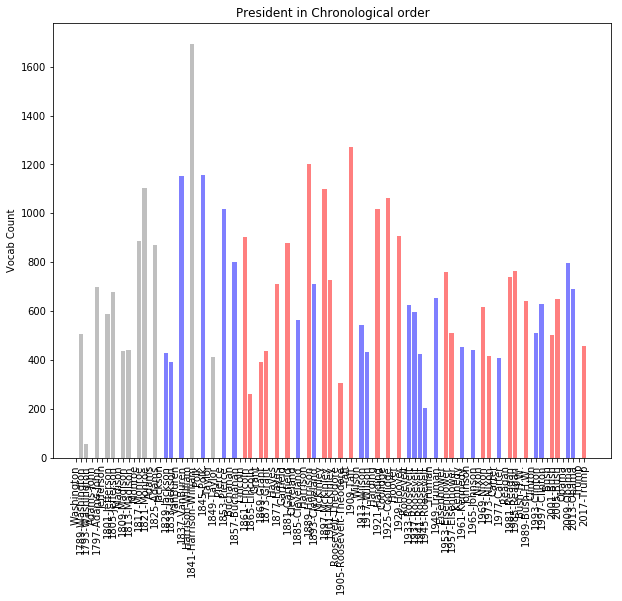

In [255]:
plt.figure(figsize=(10,8))
plt.bar(df['president_name'], df["vocab_without_stop_words"], align='center', alpha=0.5, color=df.colors)
plt.xticks(rotation = 90)
plt.ylabel('Vocab Count')
plt.title('President in Chronological order')

plt.show()

# ANSWER 3
#### 3. What are the five most frequently used words (exclusive of stop words) used by each president? Do Democratic presidents use a different set of words than Republican presidents? 

In [101]:
presidentWordsTop5Freq

for key in presidentWordsTop5Freq:
    string = ""
    for value in presidentWordsTop5Freq[key]:
        string = string+"  "+value[1]
    print("Top 5 words used by "+key+":  "+string)

Top 5 words used by Washington:    government  every  may  shall  public
Top 5 words used by Adams-John:    people  nation  government  may  state
Top 5 words used by Jefferson:    public  may  citizen  government  fellow
Top 5 words used by Madison:    war  nation  country  state  united
Top 5 words used by Monroe:    state  great  government  war  united
Top 5 words used by Adams:    government  union  upon  nation  right
Top 5 words used by Jackson:    government  power  people  state  public
Top 5 words used by VanBuren:    people  every  institution  government  country
Top 5 words used by Harrison-William:    power  government  state  people  citizen
Top 5 words used by Polk:    government  state  union  power  would
Top 5 words used by Taylor:    shall  government  interest  duty  country
Top 5 words used by Pierce:    upon  right  power  nation  state
Top 5 words used by Buchanan:    state  shall  constitution  may  government
Top 5 words used by Lincoln:    state  union  const

In [110]:
print('No. of words used by just Republican Party and Not Democratic Party: ' + str(len(R_ND)))
print('No. of words used by just Democratic Party and Not Republican Party: ' + str(len(D_NR)))
print('No. of common words used by both parties presidents: ' + str(len(common)))

No. of words used by just Republican Party and Not Democratic Party: 2400
No. of words used by just Democratic Party and Not Republican Party: 1672
No. of common words used by both parties presidents: 25136


# ANSWER 4
#### 4. Compute a sentiment (positive/negative) for each president, and draw three barplots of Democratic, Republican, and other presidents in chronological order. Which of these groups have higher mean sentiment score? Who are the top three presidents with the highest positive sentiment in each group?

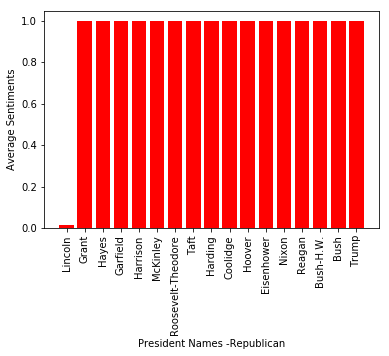

In [252]:
plt.bar(sentiment_president_republican.keys(),sentiment_president_republican.values(), color = ['red'])
plt.xlabel("President Names -Republican")
plt.xticks(rotation = 90)
plt.ylabel("Average Sentiments")
#plt.title("Average Sentiments of Republican Presidents based on thier Inaugral Speeches")
plt.show()

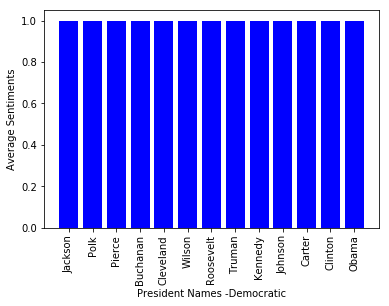

In [253]:
plt.bar(sentiment_president_democratic.keys(),sentiment_president_democratic.values(), color = ['blue'])
plt.xlabel("President Names -Democratic")
plt.xticks(rotation = 90)
plt.ylabel("Average Sentiments")
#plt.title("Average Sentiments of Democratic Presidents based on thier Inaugral Speeches")
plt.show()

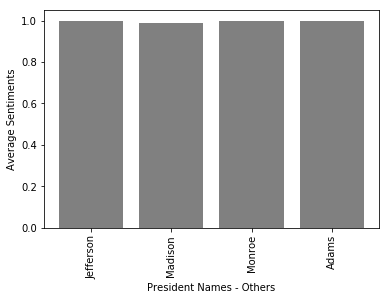

In [254]:

plt.bar(sentiment_president_others.keys(),sentiment_president_others.values(), color = ['grey'])
plt.xlabel("President Names - Others")
plt.xticks(rotation = 90)
plt.ylabel("Average Sentiments")
#plt.title("Average Sentiments of Other Party Presidents based on thier Inaugral Speeches")
plt.show()